In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt

from statistics import mode
from scipy.special import binom
from scipy.stats import iqr

import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.__version__ >= '0.9.0'
np.__version__ >= '1.15.4'
pd.__version__ >= '0.23.4'

True

In [4]:
# Read file 'ingredient.csv

formulation = pd.read_csv("ingredient.csv")
formulation.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [5]:
# Check data type

formulation.dtypes

a    float64
b    float64
c    float64
d    float64
e    float64
f    float64
g    float64
h    float64
i    float64
dtype: object

In [6]:
# Check data dimension

formulation.ndim

2

In [7]:
# Check data shape

formulation.shape

(214, 9)

In [8]:
# Check data size

formulation.size 

1926

In [9]:
# Check data info

formulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [10]:
# Transform columns into float data type

NumCols=['a','b','c','d','e','f','g','h','i']
formulation[NumCols] = formulation[NumCols].apply(lambda x: x.astype('float64'))

In [11]:
# Check data description

formulation.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [12]:
# QUESTION 1 (A)

In [13]:
# Correlation of raw data

formulation.corr()

,a,b,c,d,e,f,g,h,i
a,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
b,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
c,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
d,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
e,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
f,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
g,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
h,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
i,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


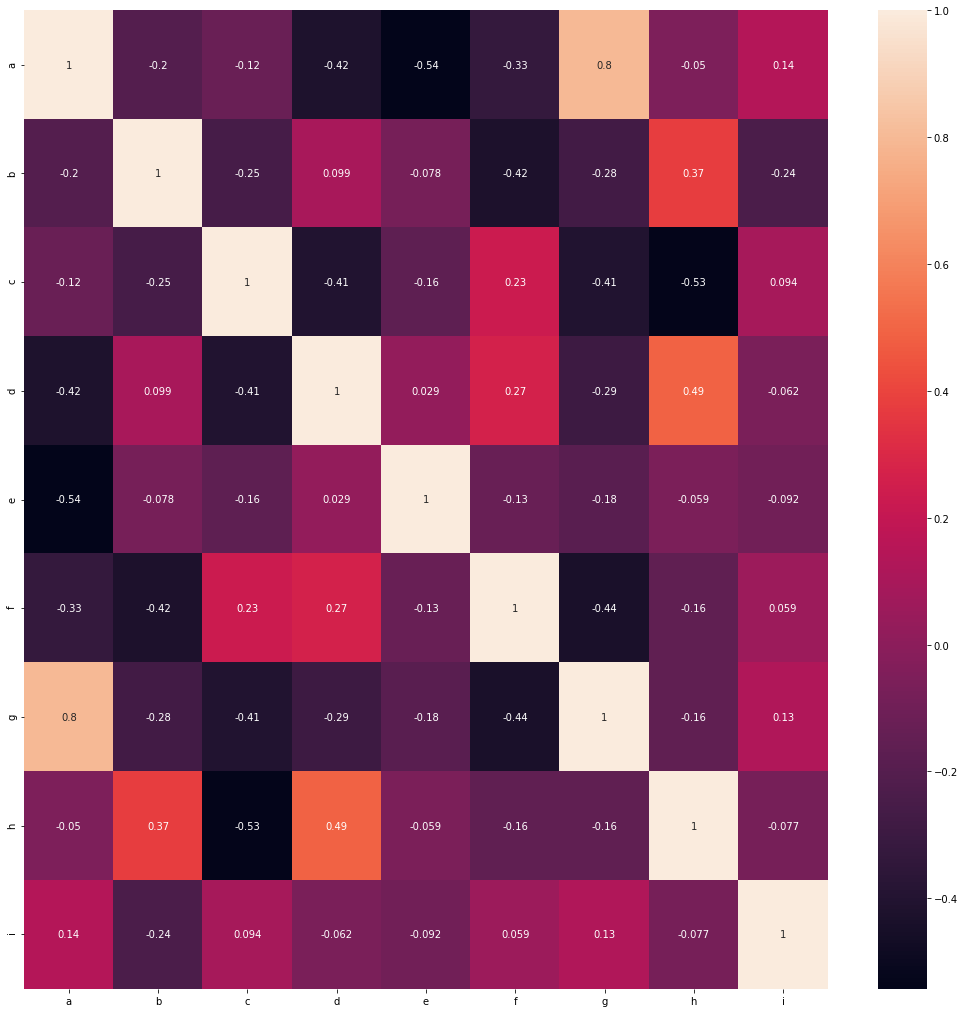

In [14]:
# Transform raw into log data and visualize correlation

formulation_log = (formulation[NumCols]+1).transform(np.log)

plt.figure(figsize = (18,18))
sns.heatmap(formulation_log.corr(), annot = True)

In [15]:
# QUESTION 1 (B)

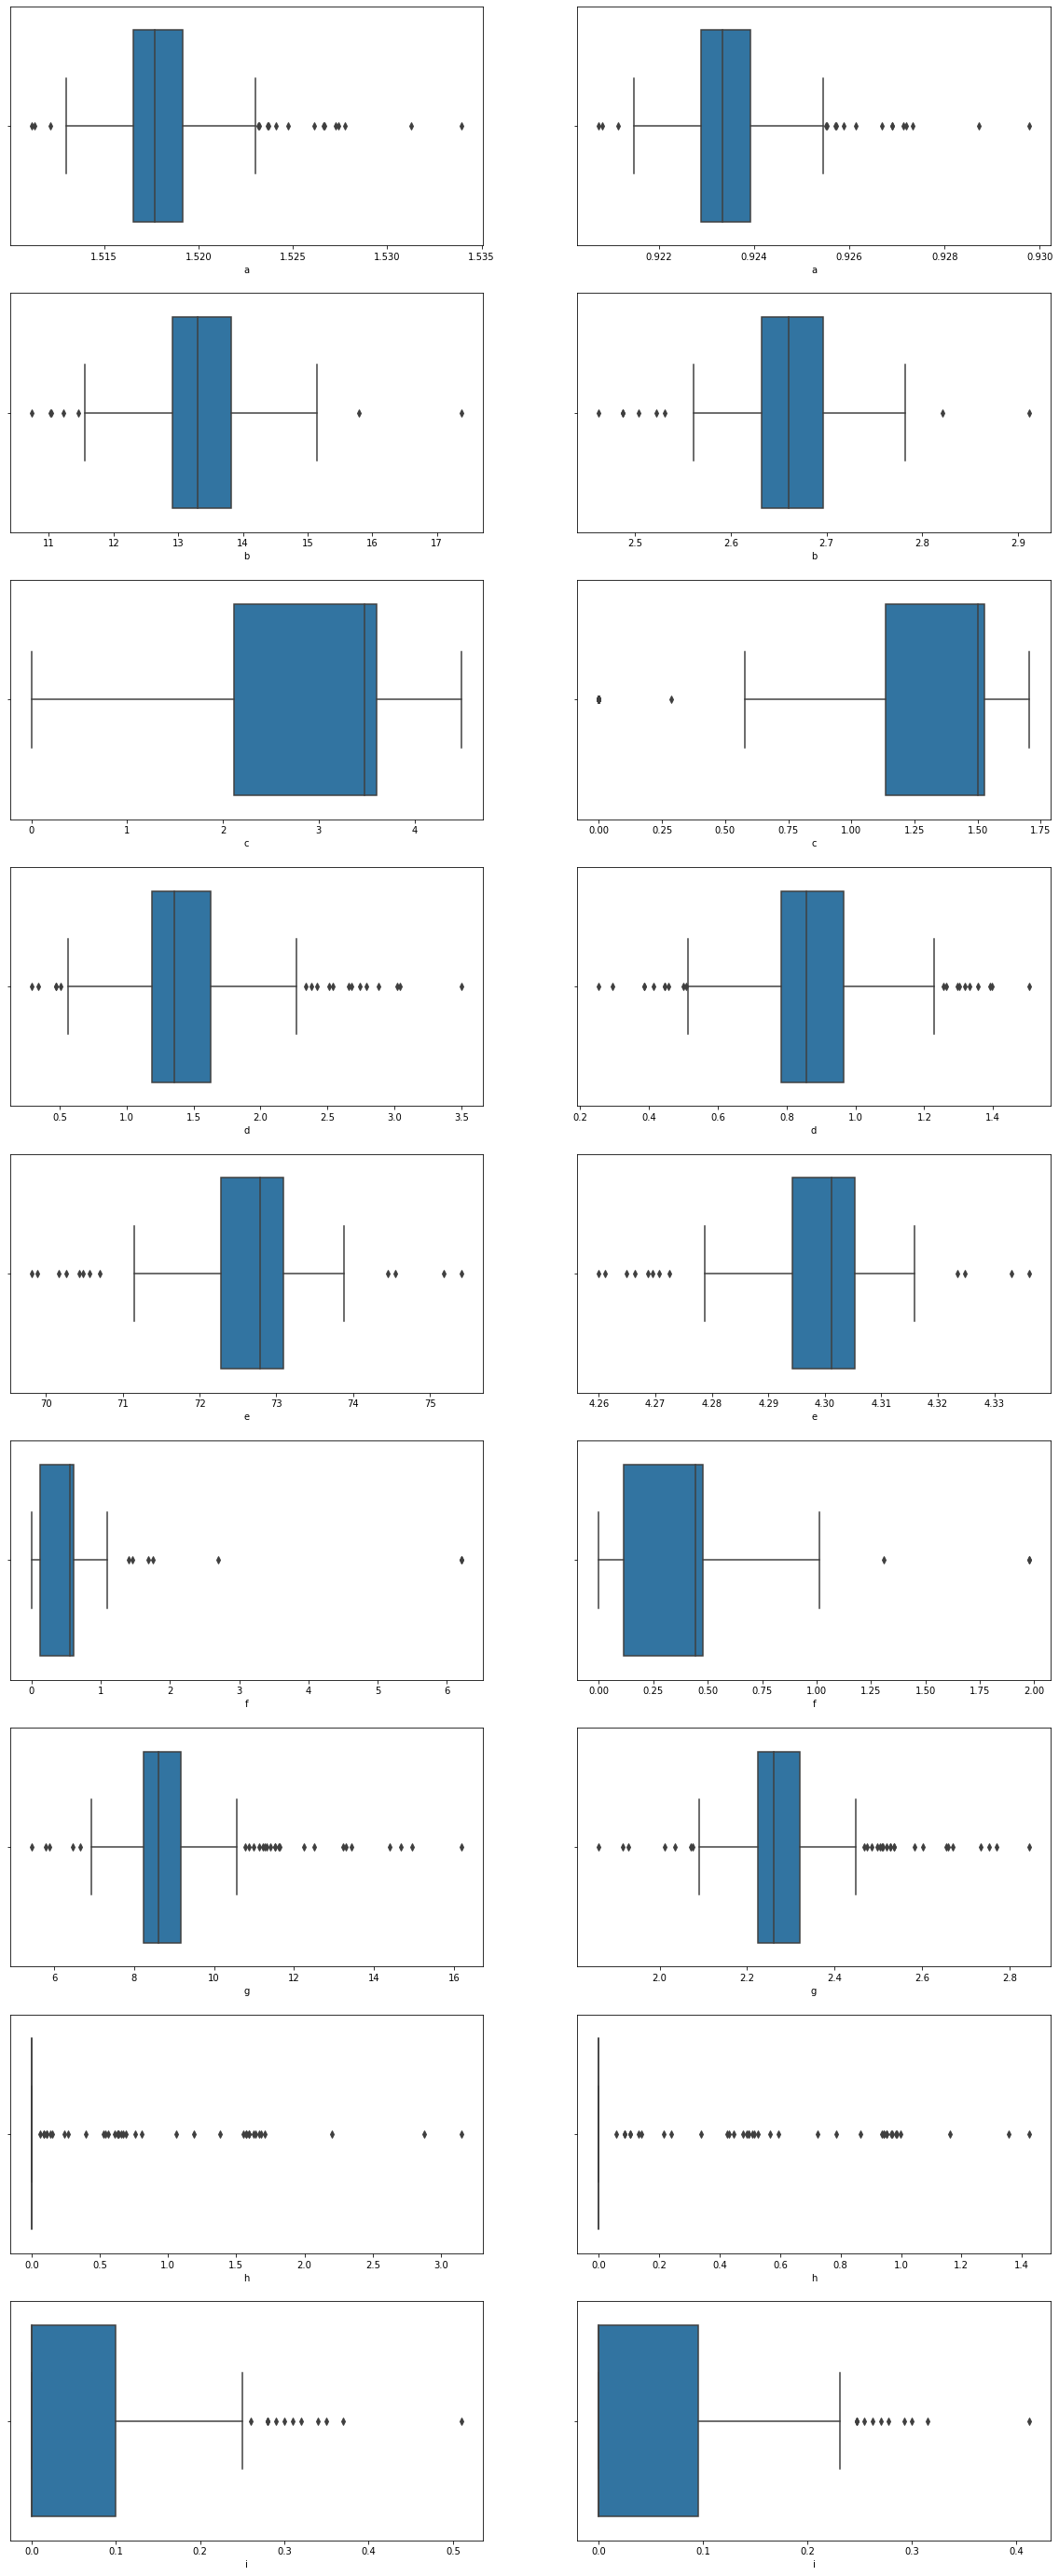

In [16]:
# Boxplot graph of raw value (left) and transformed value (right)

fig, ax = plt.subplots(nrows= len(NumCols), ncols= 2, figsize= (20,50))
for i in range(len(NumCols)):
    sns.boxplot(formulation[NumCols[i]], ax= ax[i,0])
    sns.boxplot(formulation_log[NumCols[i]], ax= ax[i,1]);

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

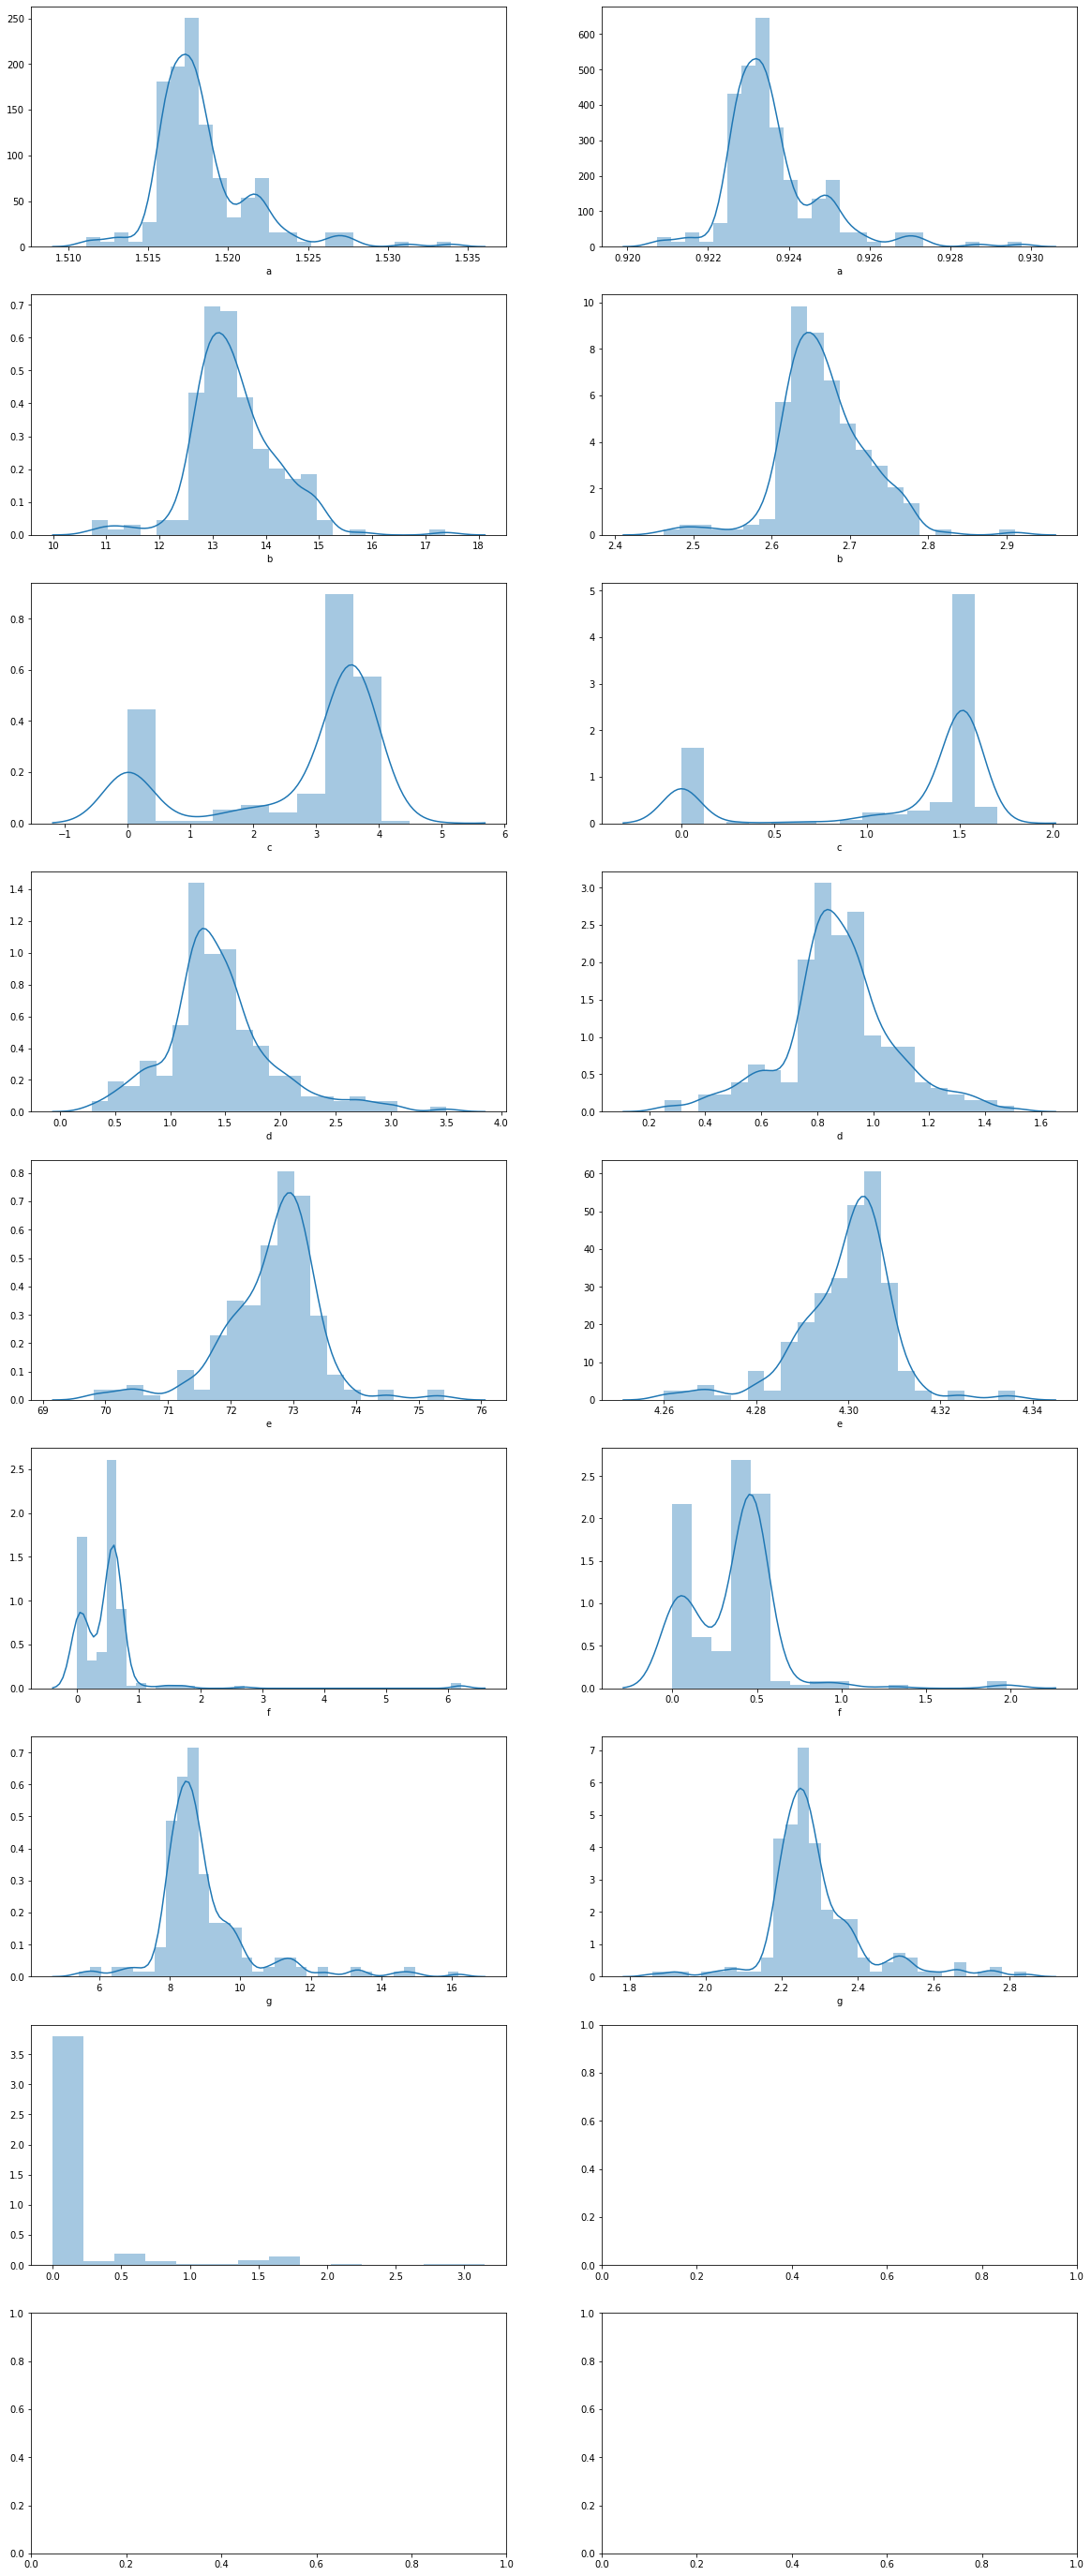

In [17]:
# Distribution graph of raw value (left) and transformed value (right)

fig, ax = plt.subplots(nrows= len(NumCols), ncols= 2, figsize= (20,50))
for i in range(len(NumCols)):
    sns.distplot(formulation[NumCols[i]], ax= ax[i,0])
    sns.distplot(formulation_log[NumCols[i]], ax= ax[i,1]);

In [ ]:
sns.lmplot(x = "a", y  = "b", data = formulation, 
           ci = 95).fig.suptitle("Factor b by a", 
                                    y=1.01)
plt.show()

In [ ]:
sns.lmplot(x = "a", y  = "c", data = formulation, 
           ci = 95).fig.suptitle("Factor c by a", 
                                    y=1.01)
plt.show()

In [ ]:
sns.lmplot(x = "a", y  = "d", data = formulation, 
           ci = 95).fig.suptitle("Factor d by a", 
                                    y=1.01)
plt.show()

In [ ]:
sns.lmplot(x = "a", y  = "e", data = formulation, 
           ci = 95).fig.suptitle("Factor e by a", 
                                    y=1.01)
plt.show()

In [ ]:
sns.lmplot(x = "a", y  = "f", data = formulation, 
           ci = 95).fig.suptitle("Factor f by a", 
                                    y=1.01)
plt.show()

In [ ]:
sns.lmplot(x = "a", y  = "g", data = formulation, 
           ci = 95).fig.suptitle("Factor g by a", 
                                    y=1.01)
plt.show()

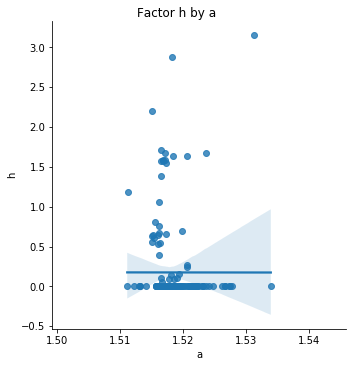

In [18]:
sns.lmplot(x = "a", y  = "h", data = formulation, 
           ci = 95).fig.suptitle("Factor h by a", 
                                    y=1.01)
plt.show()

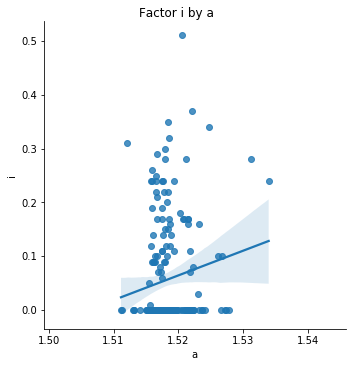

In [19]:
sns.lmplot(x = "a", y  = "i", data = formulation, 
           ci = 95).fig.suptitle("Factor i by a", 
                                    y=1.01)
plt.show()

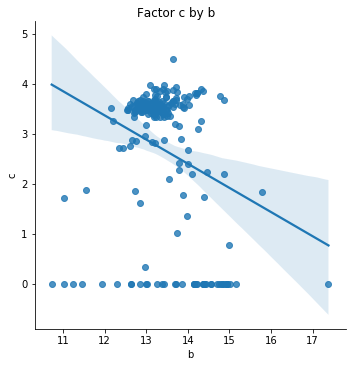

In [20]:
sns.lmplot(x = "b", y  = "c", data = formulation, 
           ci = 95).fig.suptitle("Factor c by b", 
                                    y=1.01)
plt.show()

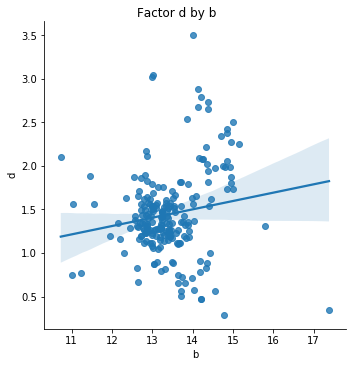

In [21]:
sns.lmplot(x = "b", y  = "d", data = formulation, 
           ci = 95).fig.suptitle("Factor d by b", 
                                    y=1.01)
plt.show()

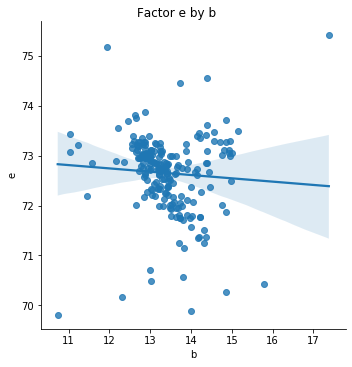

In [22]:
sns.lmplot(x = "b", y  = "e", data = formulation, 
           ci = 95).fig.suptitle("Factor e by b", 
                                    y=1.01)
plt.show()

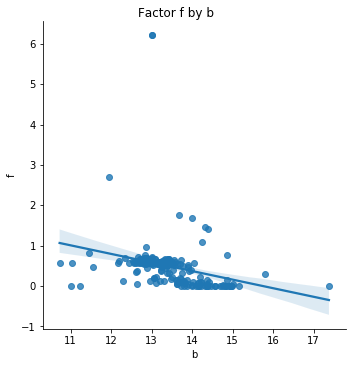

In [23]:
sns.lmplot(x = "b", y  = "f", data = formulation, 
           ci = 95).fig.suptitle("Factor f by b", 
                                    y=1.01)
plt.show()

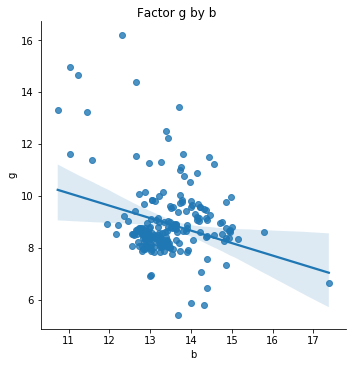

In [24]:
sns.lmplot(x = "b", y  = "g", data = formulation, 
           ci = 95).fig.suptitle("Factor g by b", 
                                    y=1.01)
plt.show()

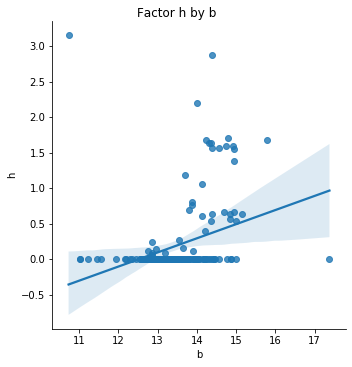

In [25]:
sns.lmplot(x = "b", y  = "h", data = formulation, 
           ci = 95).fig.suptitle("Factor h by b", 
                                    y=1.01)
plt.show()

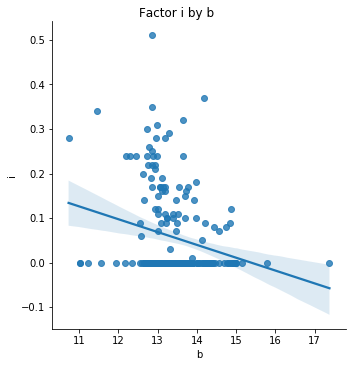

In [26]:
sns.lmplot(x = "b", y  = "i", data = formulation, 
           ci = 95).fig.suptitle("Factor i by b", 
                                    y=1.01)
plt.show()

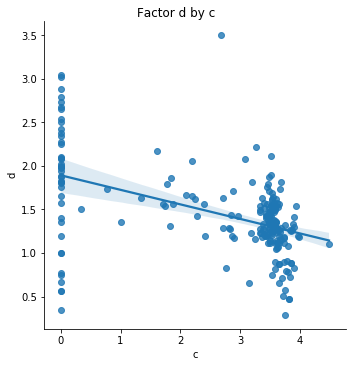

In [27]:
sns.lmplot(x = "c", y  = "d", data = formulation, 
           ci = 95).fig.suptitle("Factor d by c", 
                                    y=1.01)
plt.show()

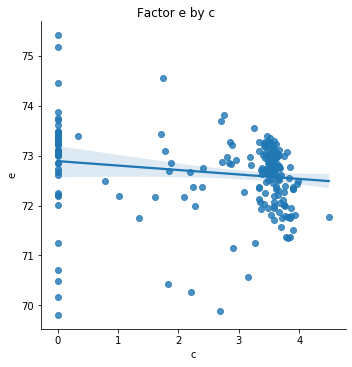

In [28]:
sns.lmplot(x = "c", y  = "e", data = formulation, 
           ci = 95).fig.suptitle("Factor e by c", 
                                    y=1.01)
plt.show()

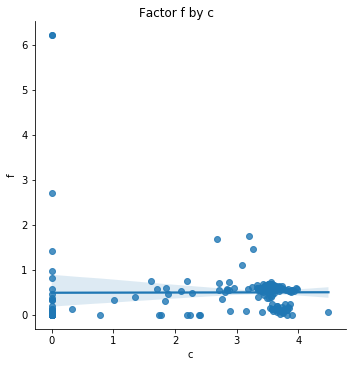

In [29]:
sns.lmplot(x = "c", y  = "f", data = formulation, 
           ci = 95).fig.suptitle("Factor f by c", 
                                    y=1.01)
plt.show()

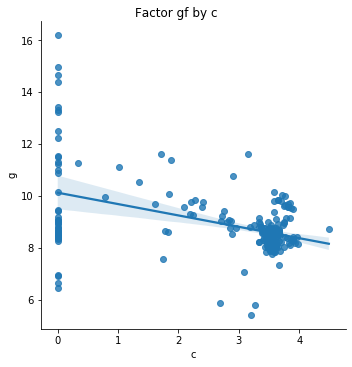

In [30]:
sns.lmplot(x = "c", y  = "g", data = formulation, 
           ci = 95).fig.suptitle("Factor gf by c", 
                                    y=1.01)
plt.show()

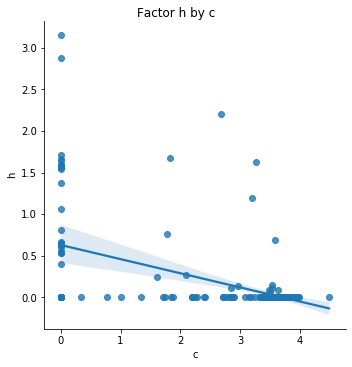

In [31]:
sns.lmplot(x = "c", y  = "h", data = formulation, 
           ci = 95).fig.suptitle("Factor h by c", 
                                    y=1.01)
plt.show()

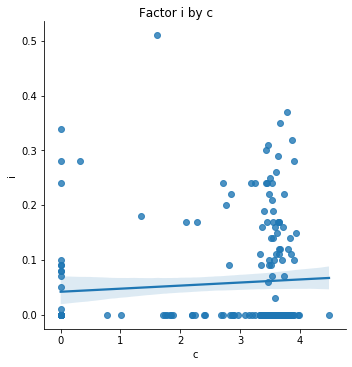

In [32]:
sns.lmplot(x = "c", y  = "i", data = formulation, 
           ci = 95).fig.suptitle("Factor i by c", 
                                    y=1.01)
plt.show()

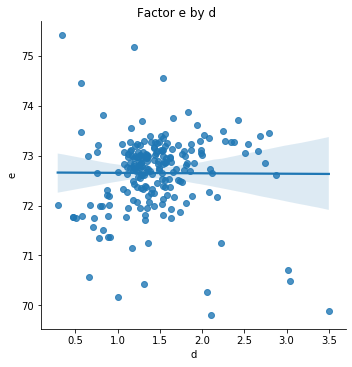

In [33]:
sns.lmplot(x = "d", y  = "e", data = formulation, 
           ci = 95).fig.suptitle("Factor e by d", 
                                    y=1.01)
plt.show()

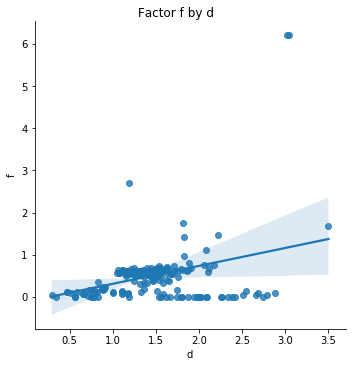

In [34]:
sns.lmplot(x = "d", y  = "f", data = formulation, 
           ci = 95).fig.suptitle("Factor f by d", 
                                    y=1.01)
plt.show()

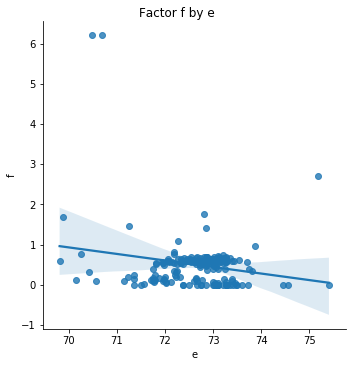

In [35]:
sns.lmplot(x = "e", y  = "f", data = formulation, 
           ci = 95).fig.suptitle("Factor f by e", 
                                    y=1.01)
plt.show()

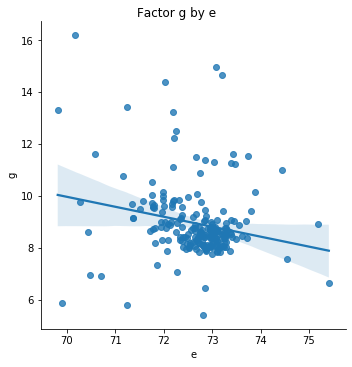

In [36]:
sns.lmplot(x = "e", y  = "g", data = formulation, 
           ci = 95).fig.suptitle("Factor g by e", 
                                    y=1.01)
plt.show()

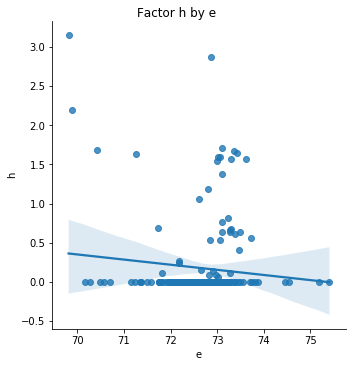

In [37]:
sns.lmplot(x = "e", y  = "h", data = formulation, 
           ci = 95).fig.suptitle("Factor h by e", 
                                    y=1.01)
plt.show()

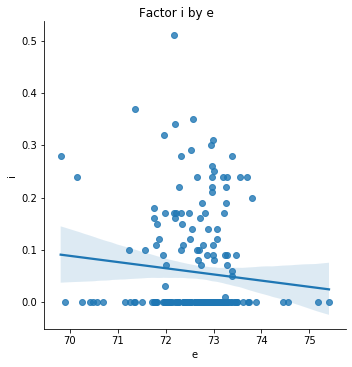

In [38]:
sns.lmplot(x = "e", y  = "i", data = formulation, 
           ci = 95).fig.suptitle("Factor i by e", 
                                    y=1.01)
plt.show()

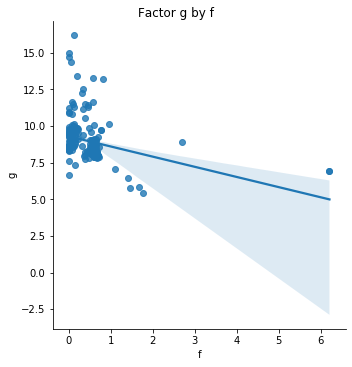

In [39]:
sns.lmplot(x = "f", y  = "g", data = formulation, 
           ci = 95).fig.suptitle("Factor g by f", 
                                    y=1.01)
plt.show()

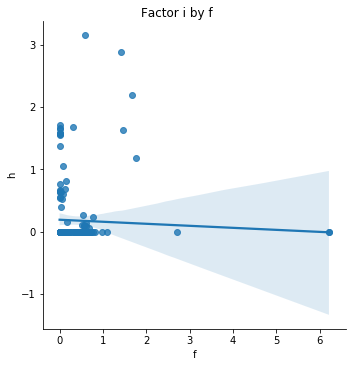

In [40]:
sns.lmplot(x = "f", y  = "h", data = formulation, 
           ci = 95).fig.suptitle("Factor i by f", 
                                    y=1.01)
plt.show()

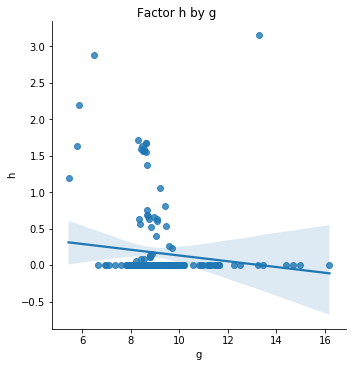

In [41]:
sns.lmplot(x = "g", y  = "h", data = formulation, 
           ci = 95).fig.suptitle("Factor h by g", 
                                    y=1.01)
plt.show()

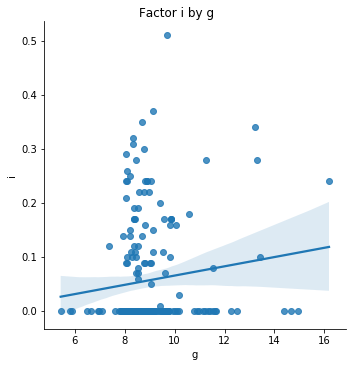

In [42]:
sns.lmplot(x = "g", y  = "i", data = formulation, 
           ci = 95).fig.suptitle("Factor i by g", 
                                    y=1.01)
plt.show()

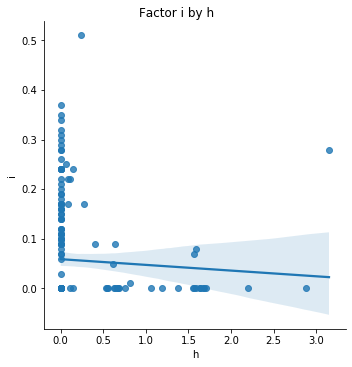

In [43]:
sns.lmplot(x = "h", y  = "i", data = formulation, 
           ci = 95).fig.suptitle("Factor i by h", 
                                    y=1.01)
plt.show()

In [44]:
# QUESTION 1 (C)

In [45]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
formulation_scaled = scaler.fit_transform(formulation)

# Statistics of scaled data
pd.DataFrame(formulation_scaled).describe()

,0,1,2,3,4,5,6,7,8
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.671280e-14,2.196581e-15,-1.265862e-16,-3.382549e-16,9.753361e-16,3.320293e-17,-3.102399e-16,-1.063531e-16,-1.556387e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


In [46]:
from sklearn.cluster import KMeans

# Defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# Fitting the k means algorithm on scaled data
kmeans.fit(formulation_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
# Inertia on the fitted data
kmeans.inertia_

1526.2793711914974

Text(0, 0.5, 'Inertia')

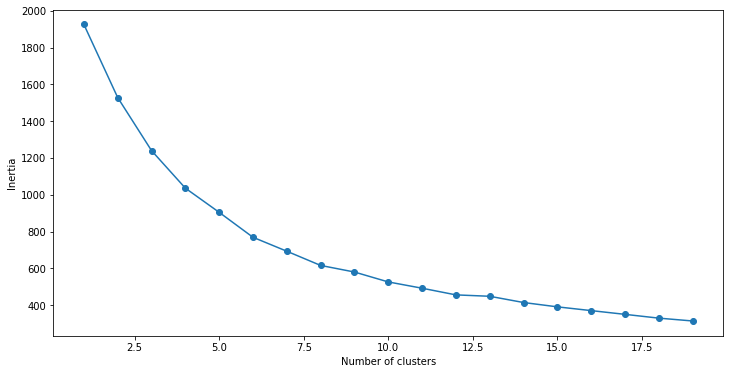

In [48]:
# Fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(formulation_scaled)
    SSE.append(kmeans.inertia_)

# Converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [49]:
# Use K-means clustering using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(formulation_scaled)
pred = kmeans.predict(formulation_scaled)

In [50]:
# Information of K-means cluster result

frame = pd.DataFrame(formulation_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    128
0     43
2     27
4     14
3      2
Name: cluster, dtype: int64

In [51]:
# Explanation of K-means cluster result

print("The distinctive number of formulations present in the dataset is 5")
print("")
print("Cluster 1 consists of 15 formulations,")
print("Cluster 2 consists of 27 formulations,")
print("Cluster 3 consists of 124 formulations (most),")
print("Cluster 4 consists of 2 formulations (least),")
print("Cluster 5 consists of 46 formulations")


The distinctive number of formulations present in the dataset is 5

Cluster 1 consists of 15 formulations,
Cluster 2 consists of 27 formulations,
Cluster 3 consists of 124 formulations (most),
Cluster 4 consists of 2 formulations (least),
Cluster 5 consists of 46 formulations
